## Colloid in harmonic trap

In [1]:
#Libraries
import numpy as np
import os
import re
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
#style of plots
mpl.style.use('tableau-colorblind10')

#library for autocorrelation function
from statsmodels.tsa.stattools import acf
from scipy.optimize import curve_fit

#### Analysys of simulations

In [2]:
#Listing the simulations
folder = 'code_colloide_harmonic_trap/output'
files = os.listdir(folder)
files = sorted(files)


#definitions useful for the analysis
N_cut = 1000
def exponential_decay(lag, tau):
    return np.exp(-lag / tau)

def aut_time(acf):
    tau = 0
    for i in range(len(acf)):
        if acf[i] < np.exp(-1):
            tau = i
            break
    return tau

dt = 0.01
x_c = 10
y_c = 10

#Df to save data from the simulation
df = pd.DataFrame(columns=['T', 'gamma', 'K', 'mean_x', 'mean_y', 'std_x', 'std_y', 'tau_x', 'tau_y'])

N: 400 Temperature: 0.1 Friction coefficient: 1.0 Elastic coefficient: 1.0
N: 400 Temperature: 0.2 Friction coefficient: 1.0 Elastic coefficient: 1.0
N: 400 Temperature: 0.4 Friction coefficient: 1.0 Elastic coefficient: 1.0
N: 400 Temperature: 0.6 Friction coefficient: 1.0 Elastic coefficient: 1.0
N: 400 Temperature: 0.8 Friction coefficient: 1.0 Elastic coefficient: 1.0
N: 400 Temperature: 1.0 Friction coefficient: 1.0 Elastic coefficient: 0.1
N: 400 Temperature: 1.0 Friction coefficient: 1.0 Elastic coefficient: 1.0
N: 400 Temperature: 1.0 Friction coefficient: 1.0 Elastic coefficient: 10.0
N: 400 Temperature: 1.0 Friction coefficient: 1.0 Elastic coefficient: 2.0
N: 400 Temperature: 1.0 Friction coefficient: 1.0 Elastic coefficient: 3.0
N: 400 Temperature: 1.0 Friction coefficient: 1.0 Elastic coefficient: 4.0
N: 400 Temperature: 1.0 Friction coefficient: 1.0 Elastic coefficient: 5.0
N: 400 Temperature: 1.0 Friction coefficient: 1.0 Elastic coefficient: 6.0
N: 400 Temperature: 1.0 

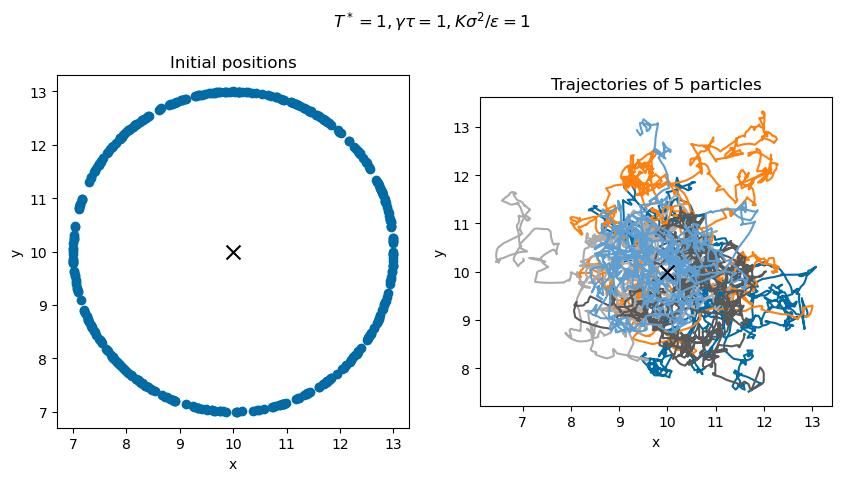

In [3]:
for file in files:    
    #extracting parameters from the file name with regex
    pattern_N = r"N_(.*?)_time"
    N = int(re.findall(pattern_N, file)[0])

    pattern_T = r"ture_(.*?)_gamma"
    T = float(re.findall(pattern_T, file)[0])

    pattern_gamma = r"gamma_(.*?)_K"
    gamma = float(re.findall(pattern_gamma, file)[0])

    pattern_K = r"K_(.*?)_real"
    K = float(re.findall(pattern_K, file)[0])

    #loading the data
    data = np.loadtxt(folder + '/' + file)

    #time
    time = data[:,0]
    time = np.unique(time)
    
    #position
    x = data[:,2].reshape(len(time), -1)
    y = data[:,3].reshape(len(time), -1)

    #Data of interest
    mean_x = np.mean(x[N_cut:])
    mean_y = np.mean(y[N_cut:])
    std_x = np.std(x[N_cut:])
    std_y = np.std(y[N_cut:])


    #autocorrelation of distance
    dist_x = x-x_c
    dist_y = y-y_c

    taus_x = []
    taus_y = []

    for i in range(N):
        C_x = acf(dist_x[N_cut:, i], nlags=len(time[N_cut:]), fft=True)
        C_y = acf(dist_y[N_cut:, i], nlags=len(time[N_cut:]), fft=True)
        taus_x.append(aut_time(C_x)*dt)
        taus_y.append(aut_time(C_y)*dt)

    tau_x = np.mean(taus_x)
    tau_y = np.mean(taus_y)
    
    if(T==1 and gamma==1 and K==1):
        #Example of trajectories

        fig, ax = plt.subplots(1, 2, figsize=(10, 5))

        ax[0].scatter(x[0, :], y[0, :])
        ax[0].scatter(x_c, y_c, color='black', s = 100, marker='x' , label='Center of the trap')
        ax[0].set_title('Initial positions')
        ax[0].set_xlabel('x')
        ax[0].set_ylabel('y')
        ax[0].set_aspect('equal')


        for i in range(5):
            ax[1].plot(x[:, i], y[:, i], label=f'Particle {i+1}', zorder=1)   
            
        ax[1].set_ylabel('y')
        ax[1].scatter(x_c, y_c, color='black', s = 100, marker='x' , label='Center of the trap', zorder=2)
        ax[1].set_title('Trajectories of 5 particles')
        ax[1].set_xlabel('x')
        ax[1].set_aspect('equal')


        fig.suptitle(r'$T^* = 1, \gamma \tau= 1, K\sigma^2 /\epsilon = 1$')


        plt.savefig('plots/example_one_trap.png')
    

    print('N:', N, 'Temperature:', T, 'Friction coefficient:', gamma, 'Elastic coefficient:', K)
    df.loc[len(df)] = [T, gamma, K, mean_x, mean_y, std_x, std_y, tau_x, tau_y]


In [4]:
df.head()

T  gamma    K     mean_x     mean_y     std_x     std_y     tau_x  \
0  0.1    1.0  1.0  10.005609   9.996758  0.394074  0.378928  8.218475   
1  0.2    1.0  1.0  10.000758   9.997459  0.497049  0.498246  7.098900   
2  0.4    1.0  1.0  10.016604  10.005065  0.665132  0.662386  7.476400   
3  0.6    1.0  1.0   9.973328  10.019013  0.803779  0.784245  7.020775   
4  0.8    1.0  1.0  10.056080  10.000520  0.904256  0.912602  7.286525   

      tau_y  
0  7.752425  
1  7.643025  
2  7.351125  
3  6.986425  
4  7.164450

#### Plots

In [5]:
T_fix = 1.0
gamma_fix = 1.0
K_fix = 1.0

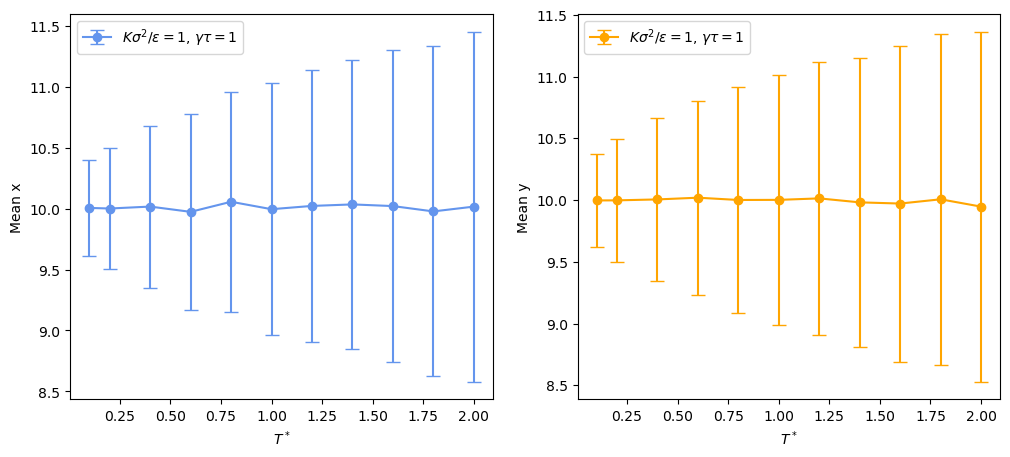

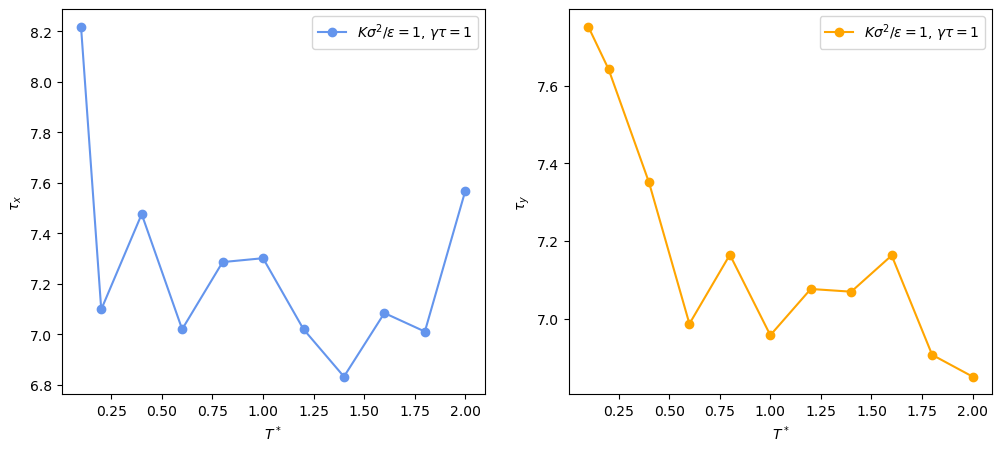

In [6]:
### Plots changing T
df_T = df[df['gamma'] == gamma_fix]
df_T = df_T[df_T['K'] == K_fix]
df_T = df_T.sort_values(by='K')

#Plot of average position and std
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].errorbar(df_T['T'], df_T['mean_x'], yerr=df_T['std_x'], fmt='o-', color = 'cornflowerblue', label=r'$K\sigma^2/\epsilon=1$, $\gamma\tau=1$', capsize=5)
ax[1].errorbar(df_T['T'], df_T['mean_y'], yerr=df_T['std_y'], fmt='o-', color = 'orange', label=r'$K\sigma^2/\epsilon=1$, $\gamma\tau=1$', capsize=5)
ax[0].set_xlabel(r'$T^*$')
ax[1].set_xlabel(r'$T^*$')
ax[0].set_ylabel('Mean x')
ax[1].set_ylabel('Mean y')
ax[0].legend()
ax[1].legend()
plt.savefig('plots/harmonic_trap_pos_changing_T.png')

#Plot of autocorrelation time
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(df_T['T'], df_T['tau_x'], 'o-', color = 'cornflowerblue', label=r'$K\sigma^2/\epsilon=1$, $\gamma\tau=1$')
ax[1].plot(df_T['T'], df_T['tau_y'], 'o-', color = 'orange', label=r'$K\sigma^2/\epsilon=1$, $\gamma\tau=1$')
ax[0].set_xlabel(r'$T^*$')
ax[1].set_xlabel(r'$T^*$')
ax[0].set_ylabel(r'$\tau_x$')
ax[1].set_ylabel(r'$\tau_y$')
ax[0].legend()
ax[1].legend()
plt.savefig('plots/harmonic_trap_tau_changing_T.png')

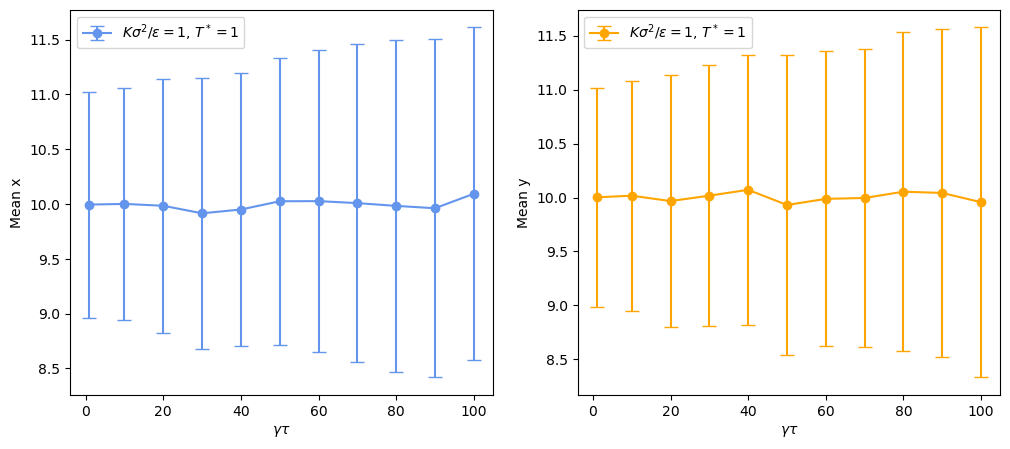

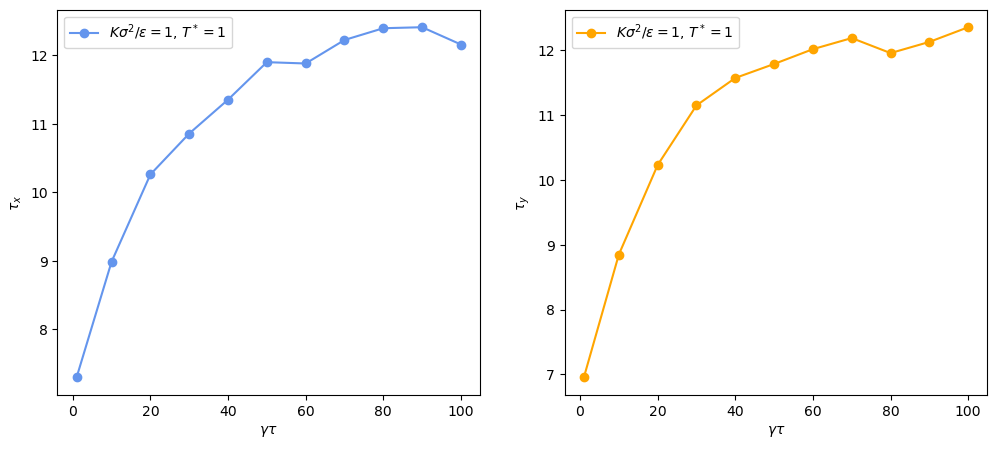

In [7]:
### Plots changing gamma
df_g = df[df['T'] == T_fix]
df_g = df_g[df_g['K'] == K_fix]
df_g = df_g.sort_values(by='gamma')

#Plot of average position and std
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].errorbar(df_g['gamma'], df_g['mean_x'], yerr=df_g['std_x'], fmt='o-', color = 'cornflowerblue', label=r'$K\sigma^2/\epsilon=1$, $T^*=1$', capsize=5)
ax[1].errorbar(df_g['gamma'], df_g['mean_y'], yerr=df_g['std_y'], fmt='o-', color = 'orange', label=r'$K\sigma^2/\epsilon=1$, $T^*=1$', capsize=5)
ax[0].set_xlabel(r'$\gamma \tau$')
ax[1].set_xlabel(r'$\gamma \tau$')
ax[0].set_ylabel('Mean x')
ax[1].set_ylabel('Mean y')
ax[0].legend()
ax[1].legend()
plt.savefig('plots/harmonic_trap_pos_changing_gamma.png')

#Plot of autocorrelation time
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(df_g['gamma'], df_g['tau_x'], 'o-', color = 'cornflowerblue', label=r'$K\sigma^2/\epsilon=1$, $T^*=1$')
ax[1].plot(df_g['gamma'], df_g['tau_y'], 'o-', color = 'orange', label=r'$K\sigma^2/\epsilon=1$, $T^*=1$')
ax[0].set_xlabel(r'$\gamma \tau$')
ax[1].set_xlabel(r'$\gamma \tau$')
ax[0].set_ylabel(r'$\tau_x$')
ax[1].set_ylabel(r'$\tau_y$')
ax[0].legend()
ax[1].legend()
plt.savefig('plots/harmonic_trap_tau_changing_gamma.png')

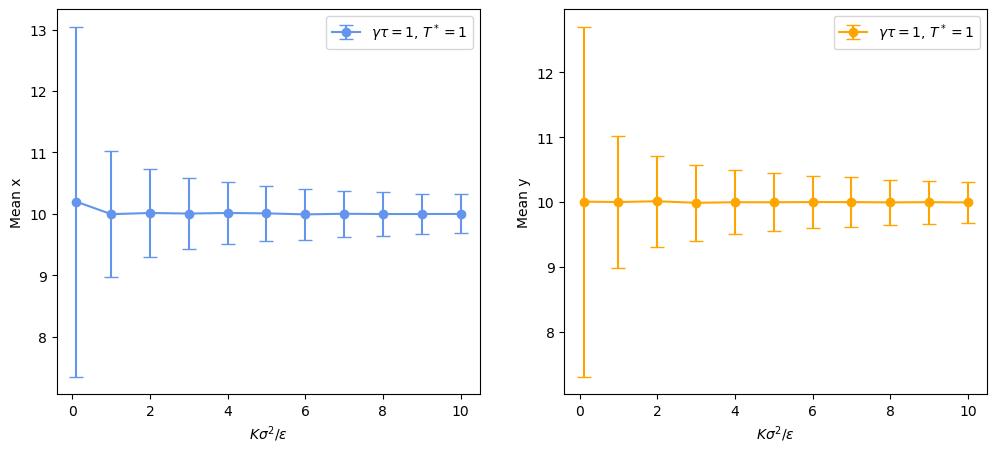

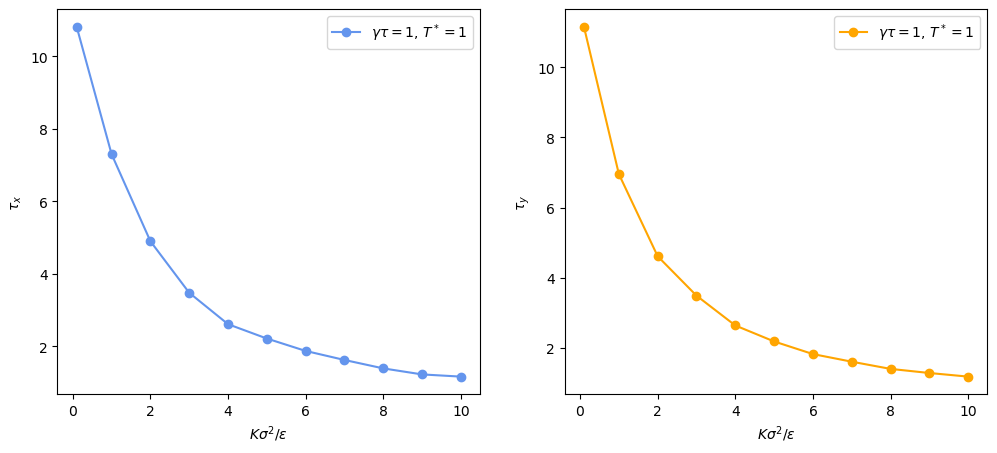

In [8]:
### Plots changing K
df_K = df[df['T'] == T_fix]
df_K = df_K[df_K['gamma'] == gamma_fix]
df_K = df_K.sort_values(by='K')

#Plot of average position and std
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].errorbar(df_K['K'], df_K['mean_x'], yerr=df_K['std_x'], fmt='o-', color = 'cornflowerblue', label=r'$\gamma \tau = 1$, $T^*=1$', capsize=5)
ax[1].errorbar(df_K['K'], df_K['mean_y'], yerr=df_K['std_y'], fmt='o-', color = 'orange', label=r'$\gamma \tau =1$, $T^*=1$', capsize=5)
ax[0].set_xlabel(r'$K\sigma^2/\epsilon$')
ax[1].set_xlabel(r'$K\sigma^2/\epsilon$')
ax[0].set_ylabel('Mean x')
ax[1].set_ylabel('Mean y')
ax[0].legend()
ax[1].legend()
plt.savefig('plots/harmonic_trap_pos_changing_K.png')

#Plot of autocorrelation time
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(df_K['K'], df_K['tau_x'], 'o-', color = 'cornflowerblue', label=r'$\gamma \tau = 1$, $T^*=1$')
ax[1].plot(df_K['K'], df_K['tau_y'], 'o-', color = 'orange', label=r'$\gamma \tau = 1$, $T^*=1$')
ax[0].set_xlabel(r'$K\sigma^2/\epsilon$')
ax[1].set_xlabel(r'$K\sigma^2/\epsilon$')
ax[0].set_ylabel(r'$\tau_x$')
ax[1].set_ylabel(r'$\tau_y$')
ax[0].legend()
ax[1].legend()
plt.savefig('plots/harmonic_trap_tau_changing_K.png')